# <img style="float: left; padding: 10px 0px 0px 0px;" src="https://static.wixstatic.com/media/57c50b_10ace1329e484af3abaa7321ca5d7010~mv2.jpg/v1/fill/w_480,h_270,al_c,lg_1,q_80,enc_auto/57c50b_10ace1329e484af3abaa7321ca5d7010~mv2.jpg"  width="300" /> Prueba técnica Argos
**Ivan Mendoza**<br>

---

Comenzamos importando los paquetes necesarios:

In [1]:
# !pip install lazypredict

In [127]:
# from lazypredict.Supervised import LazyClassifier


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score, f1_score, accuracy_score, roc_curve, auc, classification_report

from sklearn.model_selection import GridSearchCV

##### Prueba de Ingreso:

Se solicita resolver los siguientes puntos de análisis, para esto puede usar *Python*, *R* o *Spark*.

##### Recursos Necesarios

Software adecuado para realizar la prueba de acuerdo con el lenguaje que vaya a usar, se
recomienda usa

- Anaconda
- R Studio
- Databricks<br>

O lo que considere útil para desarrollar su prueba.


Datasets necesarios para el desarrollo de al prueba

[Dataset Iris.](https://www.kaggle.com/saurabh00007/iriscsv) <br>

[Dataset Crímenes chicago.](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzpq8t2) <br>
Debido a que es una cantidad muy grande de datos, tome solo los últimos 3
años de información (2016-2019), puede filtrar directamente desde la fuenteba.

In [3]:
df_iris = pd.read_csv("../Data/Iris.csv")
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
1,2,4.90,3.00,1.40,0.20,Iris-setosa
2,3,4.70,3.20,1.30,0.20,Iris-setosa
3,4,4.60,3.10,1.50,0.20,Iris-setosa
4,5,5.00,3.60,1.40,0.20,Iris-setosa


##### Preprocesamiento

Validamos que las información no se encuentre con valores nulos

In [4]:
#Vemos si el dataset presenta valores nulos
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Eliminamos columna innecesaria
df_iris.drop("Id",axis=1,inplace=True)

##### Estadísticas descriptivas

Ahora, podemos calcular las estadísticas descriptivas básicas para cada variable en el conjunto de datos. Con el método `describe()` obtenemos un resumen:

In [6]:
df_iris.Species.value_counts().to_frame()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [7]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


Antes de, pondremos una imagen de las partes de una flor para dar contexto de que partes de las iris fueron medidas:

<img style="float: left; padding: 0px 0px 0px 0px;" src="https://content.codecademy.com/programs/machine-learning/k-means/iris.svg"  width="400" />
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
A continuación, se detalla un primer análisis estadistico general de todas la especies:

1. Sépalo:

    1.1. Longitud (SepalLengthCm):
    
    - Promedio (mean): El promedio de la longitud del sepalo de las tres distintas especies de iris incluidas en dataset es de **5.84 centimetros (cm)**.
    
    - Desviación estándar (std): La desviación estándar de la longitud del sépalo de las especies iris tienden a variar alrededor de **0.83 cm**  con respecto a la media.
    
    - minimo (min): La longitud mínima del sépalo de las flores iris es de **4.3 cm**.
    
    - maximo (max): La longitud máxima del sépalo es de **7.9 cm**.
    
    1.2. Amplitud (SepalWidthCm):
    
    - Promedio (mean): El promedio de la amplitud del sepalo de las iris del dataset es de **3.05  cm**.
    
    - Desviación estándar (std): La desviación estándar de la amplitud del sépalo de las especies iris tienden a variar alrededor de **0.43 cm**  con respecto a la media.
    
    - minimo (min): La amplitud mínima del sépalo de las flores iris es de **2 cm**.
    
    - maximo (max): La amplitud máxima del sépalo es de **4.4 cm**.
<br> 

2. Petalo:<br>
    2.1. Longitud (PetalLengthCm):
    
    - Promedio (mean): El promedio de la longitud del petalo de las tres distintas especies de iris incluidas en dataset es de **3.76 centimetros (cm)**.
    
    - Desviación estándar (std): La desviación estándar de la longitud del petalo de las especies iris tienden a variar alrededor de **1.76 cm**  con respecto a la media.
    
    - minimo (min): La longitud mínima del petalo de las flores iris es de **1 cm**.
    
    - maximo (max): La longitud máxima del petalo es de **6.9 cm**.
    
    2.2. Amplitud (PetalWidthCm):
    
    - Promedio (mean): El promedio de la amplitud del petalo de las iris del dataset es de **1.2  cm**.
    
    - Desviación estándar (std): La desviación estándar de la amplitud del petalo de las especies iris tienden a variar alrededor de **0.76 cm**  con respecto a la media.
    
    - minimo (min): La amplitud mínima del petalo de las flores iris es de **0.1 cm**.
    
    - maximo (max): La amplitud máxima del petalo es de **2.5 cm**.

##### Análisis Explotario de Datos

In [8]:
plt.style.use("seaborn-v0_8-darkgrid")
def Plot(dataset,features):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(dataset[features],bins=30) 
    plt.title(f"{features} DistPlot")
    plt.xlabel(f"{features}",fontweight="bold")
    plt.ylabel("Densidad",fontweight="bold")
    # Validar si existen outliers    
    plt.subplot(1,2,2)
    sns.boxplot(df_iris[features] )
    plt.xlabel(f"{features}",fontweight="bold")
    plt.ylabel("cm",fontweight="bold")
    plt.title("Boxplot de {}".format(features))

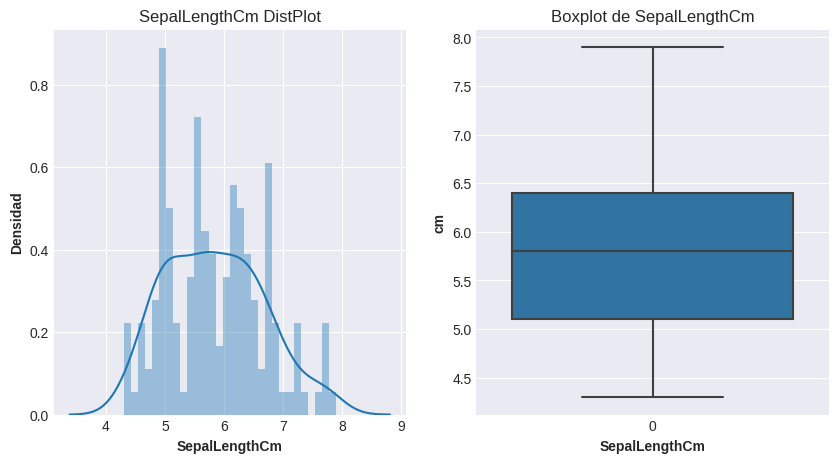

In [9]:
# Grafícas de la longitud del Sépalo
Plot(df_iris,"SepalLengthCm")

Vemos que los datos de la longitud del sépalo de iris no presentan outliers, adicionalmente, estos son unimodal con la displot.

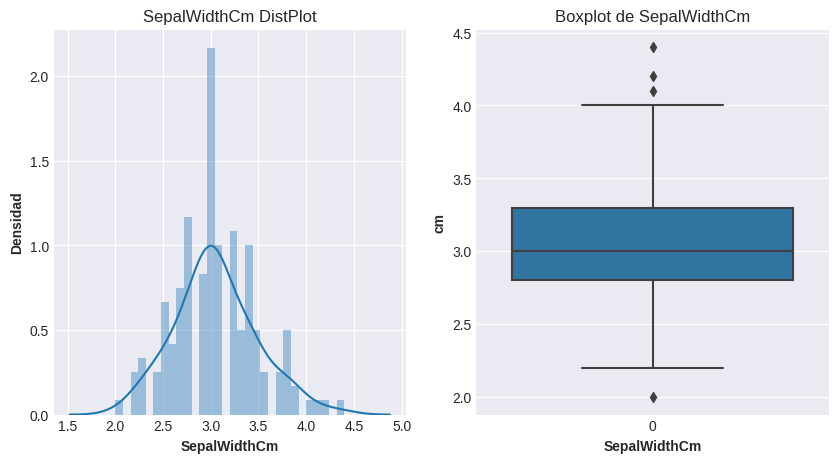

In [10]:
# Grafícas de la amplitud del Sépalo
Plot(df_iris,"SepalWidthCm")

Vemos que los datos de la amplitud del sépalo de iris presenta algunos outliers, adicionalmente, estos se distribuyen de manera normal con una alta concentración solo la media de 3.05.

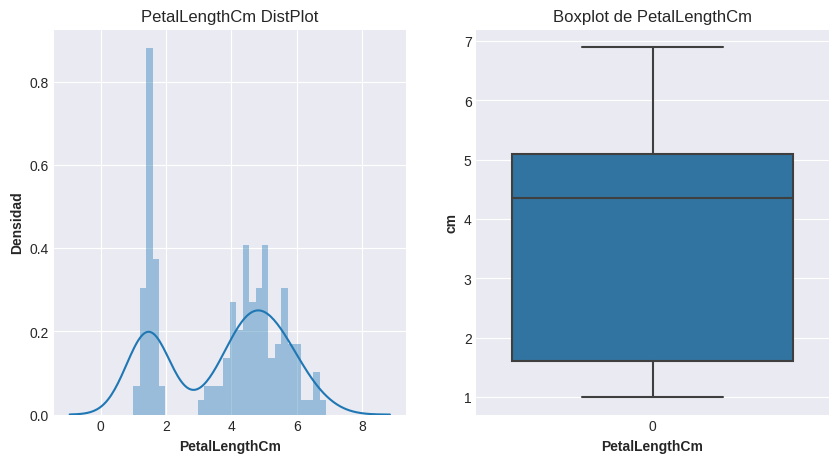

In [11]:
# Grafícas de la longitud del petalo
Plot(df_iris,"PetalLengthCm")

Vemos que los datos de la longitud del petalo de iris no presentan outliers, además, estos son multimodal con la displot.

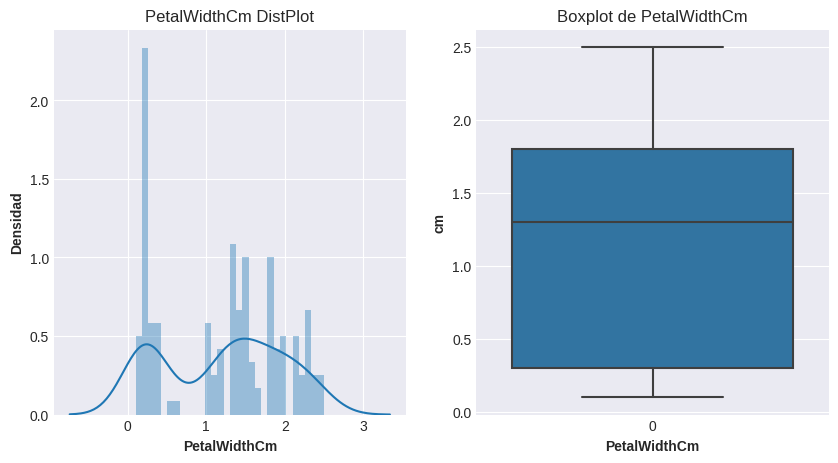

In [12]:
# Grafícas de la amplitud del petalo
Plot(df_iris,"PetalWidthCm")

Vemos que los datos de la amplitud del petalo de iris no presentan outliers, también, estos son multimodal así como lo es la longitud.

##### Scatter plot de las dos partes de las flores Iris

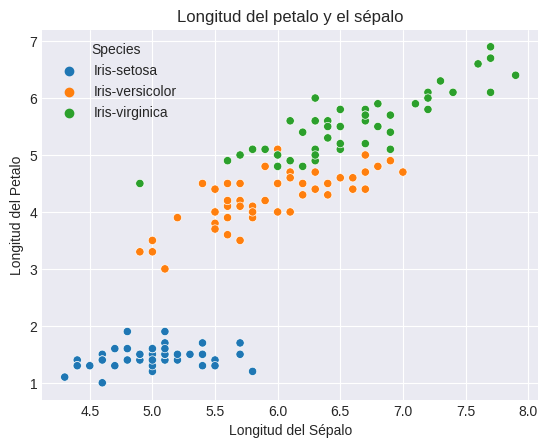

In [13]:
sns.scatterplot(data=df_iris,x="SepalLengthCm",y="PetalLengthCm",hue="Species")
plt.title("Longitud del petalo y el sépalo")
plt.xlabel("Longitud del Sépalo")
plt.ylabel("Longitud del Petalo");
plt.show()

Se observa un correlación positiva entre la longitud del petelo y el sépalo para las especies Iris-versicolor y la Iris virginica.

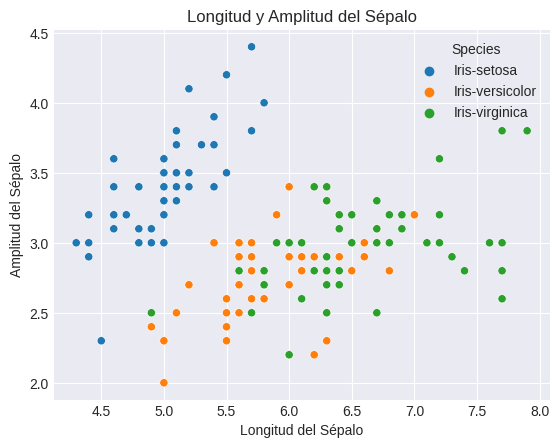

In [14]:
sns.scatterplot(data=df_iris,x="SepalLengthCm",y="SepalWidthCm",hue="Species")
plt.title("Longitud y Amplitud del Sépalo")
plt.xlabel("Longitud del Sépalo")
plt.ylabel("Amplitud del Sépalo");
plt.show()

También observamos una correlación positiva en este caso para todas las especies entre la longitud y amplitud del sépalo.

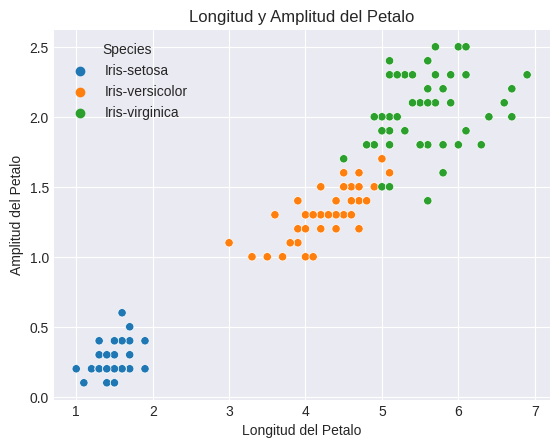

In [15]:
sns.scatterplot(data=df_iris,x="PetalLengthCm",y="PetalWidthCm",hue="Species")
plt.title("Longitud y Amplitud del Petalo")
plt.xlabel("Longitud del Petalo")
plt.ylabel("Amplitud del Petalo");
plt.show()

Vemos además de la correlación positivo entre la longitud y la amplitud del petalo, que así como en el primer boxplot la especie Iris-setosa es la especie pequeña de las tres, seguida por un tamaño medio-alto por la especie Iris-versicolor y por último con un tamaño generalmente mayor vemos la especie Iris-virginica.

##### Dividiendo y prepocesando la data para los modelos

In [16]:
## Aplicamos el labelEncoder para volver numerica la variable objetivo 
lbe = LabelEncoder()
df_iris["Species"] = lbe.fit_transform(df_iris["Species"])

In [17]:
X = df_iris.drop("Species",axis=1)
y = df_iris["Species"]

Usualmente para modelos se aplica un set de testeo del 20% de la data, pero como en este caso son tan pocos datos, vamos a tomar el 30%.

In [66]:

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=33)

print("Tamaño de X_train:",X_train.shape)
print("Tamaño de X_test:",X_test.shape)
print("Tamaño de y_train:",y_train.shape)
print("Tamaño de y_test:",y_test.shape)

Tamaño de X_train: (105, 4)
Tamaño de X_test: (45, 4)
Tamaño de y_train: (105,)
Tamaño de y_test: (45,)


##### Modelos

In [75]:
#Generamos una lista de los modelos a probar - LogisticRegression, 
models = [("LR" ,LogisticRegression(random_state = 4)),
          ("DTR" ,DecisionTreeClassifier(random_state = 4)),
          ("RFC" , RandomForestClassifier(random_state = 4)),
          ("KNN",KNeighborsClassifier())]

In [76]:
for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"====================={model}=====================")

    print(f"El Precision Score del modelo {model} es:",{np.round(precision_score(y_test, y_pred, average="weighted"),2)*100})
    print(f"El F1 Score del modelo {model} es:",({np.round(f1_score(y_test,y_pred,average="weighted"),2)*100}))
    print(f"El Accuracy del modelo {model} es:",{(np.round(accuracy_score(y_test,y_pred),2))*100})
    print("-"*64)
    print((classification_report(y_pred, y_test)))
    
    print("="*100)

=====================LogisticRegression(random_state=4)=====================
El Precision Score del modelo LogisticRegression(random_state=4) es: {94.0}
El F1 Score del modelo LogisticRegression(random_state=4) es: {93.0}
El Accuracy del modelo LogisticRegression(random_state=4) es: {93.0}
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        18
           2       0.84      1.00      0.91        16

    accuracy                           0.93        45
   macro avg       0.95      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45

=====================DecisionTreeClassifier(random_state=4)=====================
El Precision Score del modelo DecisionTreeClassifier(random_state=4) es: {93.0}
El F1 Score del modelo DecisionTreeClassifier(random_state=4) es: {91.0}
El Accuracy del modelo Decisi

Vemos que el modelo que presenta mejores resultados es el KNeighborsClassifier con Precision, F1 y Accuracy del 96%, ahora procederemos a realizar Hyperparamter Tuning para mejorar los resultados de los modelos con la función `GridSearchCV` de sklearn

##### Tunning de los hyperametros de los cuadro modelos

###### Modelo de Regresión Logistica

In [152]:
grid = {"C":np.logspace(2,10), 
        "penalty":[None,"l1","l2","elasticnet"]}

LR = LogisticRegression(random_state=4)

LR_cv = GridSearchCV(LR, 
                     grid, 
                     cv=10)

LR_cv.fit(X_train, y_train)
print("Los mejores hyparametros para la regresión son:", LR_cv.best_params_)

Los mejores hyparametros para la regresión son: {'C': 100.0, 'penalty': None}


Ajustamos el modelo de *Regresión Logistica* con los hyperparemetros dado por el modelo.

In [153]:
f1 = {}
accuracy = {}
precision = {}
auc_m = {}

In [154]:
df_mcl = pd.DataFrame()
LR_HT = LogisticRegression(C=100,
                           penalty=None,
                           random_state=4)

LR_HT.fit(X_train, y_train)
y_pred = LR_HT.predict(X_test)

name = "Regresión Logistica"

f1[name] = np.round(f1_score(y_test, y_pred, average="weighted"), 3)*100
accuracy[name] = np.round(accuracy_score(y_test, y_pred), 3)*100
precision[name] = np.round(precision_score(y_test, y_pred, average="weighted"), 3)*100
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
auc_m[name] = np.round(auc(fpr, tpr), 3)*100

print(f"El F1 Score del modelo después del tunning: {f1[name]} %")
print(f"El Accuracy del modelo] después del tunning: {accuracy[name]} %")
print(f"La Precision del modelo después del tunning: {precision[name]} %")
print(f"Area bajo la curva del modelo después del tunning: {auc_m[name]} %")

El F1 Score del modelo después del tunning: 100.0 %
El Accuracy del modelo] después del tunning: 100.0 %
La Precision del modelo después del tunning: 100.0 %
Area bajo la curva del modelo después del tunning: 100.0 %


In [155]:
df_mcl = pd.DataFrame(data = [f1, accuracy, precision, auc_m], index = ["F1", "Accuracy", "Precision", "AUC"] , columns=[name])
df_mcl

,Regresión Logistica
F1,100.00
Accuracy,100.00
Precision,100.00
AUC,100.00


###### Modelo de Arbol de Decisión

In [156]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy'],
              'max_features' : [1,3,5,7]
             }

DTC = DecisionTreeClassifier(random_state=4)
grid_search = GridSearchCV(estimator=DTC, 
                           param_grid=param_grid, 
                           cv=8, 
                           verbose=True)

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 8 folds for each of 120 candidates, totalling 960 fits


{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'max_features': 3}

Ajustamos el modelo de *Arbol de Decisión* con los hyperparemetros dado por el modelo.

In [157]:
DTR_HT = DecisionTreeClassifier(ccp_alpha= 0.01, 
                                criterion= 'gini', 
                                max_depth= 5, 
                                max_features= 3)
DTR_HT.fit(X_train,y_train)
y_pred = DTR_HT.predict(X_test)

name = "Arbol de Decisión"

f1[name] = np.round(f1_score(y_test, y_pred, average="weighted"), 3)*100
accuracy[name] = np.round(accuracy_score(y_test, y_pred), 3)*100
precision[name] = np.round(precision_score(y_test, y_pred, average="weighted"), 3)*100
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
auc_m[name] = np.round(auc(fpr, tpr), 3)*100

print(f"El F1 Score del modelo después del tunning: {f1[name]} %")
print(f"El Accuracy del modelo después del tunning: {accuracy[name]} %")
print(f"La Precision del modelo después del tunning: {precision[name]} %")
print(f"Area bajo la curva del modelo después del tunning: {auc_m[name]} %")

El F1 Score del modelo después del tunning: 91.10000000000001 %
El Accuracy del modelo después del tunning: 91.10000000000001 %
La Precision del modelo después del tunning: 93.0 %
Area bajo la curva del modelo después del tunning: 93.89999999999999 %


In [158]:
df_mcl[name] = [f1[name], accuracy[name], precision[name], auc_m[name]]
df_mcl

,Regresión Logistica,Arbol de Decisión
F1,100.00,91.10
Accuracy,100.00,91.10
Precision,100.00,93.00
AUC,100.00,93.90


###### Modelo de bosque aleatorio

In [166]:
grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

RFC = RandomForestClassifier(random_state=4)

grid_search = GridSearchCV(RFC,
                      grid,
                      cv=5,
                      verbose=True,
                      n_jobs=-1)

grid_search.fit(X_train,y_train)

grid_search.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

Ajustamos el modelo de *Bosque Aleatorio* con los hyperparemetros dado por el modelo.

In [167]:
RFC = RandomForestClassifier(bootstrap= True,
                             max_depth= 90,
                             max_features= 2,
                             min_samples_leaf= 3,
                             min_samples_split= 8,
                             n_estimators= 200)

RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)

name = "Bosque Aleatorio"

f1[name] = np.round(f1_score(y_test, y_pred, average="weighted"), 3)*100
accuracy[name] = np.round(accuracy_score(y_test, y_pred), 3)*100
precision[name] = np.round(precision_score(y_test, y_pred, average="weighted"), 3)*100
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
auc_m[name] = np.round(auc(fpr, tpr), 3)*100

print(f"El F1 Score del modelo después del tunning: {f1[name]} %")
print(f"El Accuracy del modelo después del tunning: {accuracy[name]} %")
print(f"La Precision del modelo después del tunning: {precision[name]} %")
print(f"Area bajo la curva del modelo después del tunning: {auc_m[name]} %")

El F1 Score del modelo después del tunning: 95.6 %
El Accuracy del modelo después del tunning: 95.6 %
La Precision del modelo después del tunning: 96.1 %
Area bajo la curva del modelo después del tunning: 97.0 %


In [168]:
df_mcl[name] = [f1[name], accuracy[name], precision[name], auc_m[name]]
df_mcl

,Regresión Logistica,Arbol de Decisión,Bosque Aleatorio
F1,100.00,91.10,95.60
Accuracy,100.00,91.10,95.60
Precision,100.00,93.00,96.10
AUC,100.00,93.90,97.00


###### Modelo KNN 

In [169]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

KNN = KNeighborsClassifier()

grid_search  = GridSearchCV(KNN,
                            grid_params,
                            verbose=1,
                            n_jobs=-1,
                            cv=3)
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

Ajustamos el modelo de *KNeighbors* con los hyperparemetros dado por el modelo.

In [170]:
KNN = KNeighborsClassifier(metric="manhattan",
                           n_neighbors=9, 
                           weights="uniform")

KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

name = "KNeighbors"

f1[name] = np.round(f1_score(y_test, y_pred, average="weighted"), 3)*100
accuracy[name] = np.round(accuracy_score(y_test, y_pred), 3)*100
precision[name] = np.round(precision_score(y_test, y_pred, average="weighted"), 3)*100
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
auc_m[name] = np.round(auc(fpr, tpr), 3)*100

print(f"El F1 Score del modelo después del tunning: {f1[name]} %")
print(f"El Accuracy del modelo después del tunning: {accuracy[name]} %")
print(f"La Precision del modelo después del tunning: {precision[name]} %")
print(f"Area bajo la curva del modelo después del tunning: {auc_m[name]} %")

El F1 Score del modelo después del tunning: 97.8 %
El Accuracy del modelo después del tunning: 97.8 %
La Precision del modelo después del tunning: 97.89999999999999 %
Area bajo la curva del modelo después del tunning: 98.5 %


In [171]:
df_mcl[name] = [f1[name], accuracy[name], precision[name], auc_m[name]]
df_mcl

,Regresión Logistica,Arbol de Decisión,Bosque Aleatorio,KNeighbors
F1,100.00,91.10,95.60,97.80
Accuracy,100.00,91.10,95.60,97.80
Precision,100.00,93.00,96.10,97.90
AUC,100.00,93.90,97.00,98.50


##### Conclusiones

De acuerdo con los resultados de los diferentes modelos de aprendizaje automático aplicados (Regresión Logistica, Árbol de Decisión, Bosque Aleatorio y K-Vecinos más Cercanos), el modelo de **Regresión Logistica presenta metricas perfectas para nuestro dataset de test**, sin embargo, existe la preocupación de que el dataset es pequeño ya que apenas son 150 datos, y estos puedan estar sobreajustados y no predecir cambios repentinos a futuro.

Recordemos que la metrica **F1** es útil para evaluar el equilibrio entre la precisión y la exhaustividad de un modelo de clasificación. El **Accuracy** es una métrica que mide la proporción de predicciones correctas en relación con el número total de predicciones. La **Precision** es una métrica que mide la proporción de predicciones positivas verdaderas en relación con todas las predicciones positivas realizadas por el modelo. Y por ultimo, el **AUC** mide la capacidad de un modelo para distinguir entre clases positivas y negativas. Un valor de AUC del 100% indica un modelo perfecto en términos de discriminación entre clases.